# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results)


# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
unique_mice_df = pd.DataFrame({'Mouse ID': combined_df['Mouse ID'].unique()})
mice_count_int = unique_mice_df.count()
print(mice_count_int)

Mouse ID    249
dtype: int64


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mice_duplicates = combined_df.loc[combined_df.duplicated(["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
print(mice_duplicates)

['g989']


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_g898 = combined_df.loc[combined_df['Mouse ID'] == 'g989']
mouse_g898

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


This mouse has duplicate timepoints with different values

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#study group helped with this code
clean_mouse_df = combined_df[combined_df["Mouse ID"] != 'g989']
clean_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.

clean_mouse_df['Mouse ID'].unique()
mice_count_int = len(clean_mouse_df['Mouse ID'].unique())

print(mice_count_int)

248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

tumor_mean = []
tumor_median = []
tumor_var =[]
tumor_std = []
tumor_sem = []

drug_regimens = clean_mouse_df['Drug Regimen'].unique()

# Loop through each drug regimen and calculate the mean
for regimen in drug_regimens:
    # Filter the DataFrame for the current drug regimen
    regimen_data = clean_mouse_df[clean_mouse_df['Drug Regimen'] == regimen]

    # Calculate the statistics for the current drug regimen
    mean_tumor_volume = np.mean(regimen_data['Tumor Volume (mm3)'])
    median_tumor_volume = np.median(regimen_data['Tumor Volume (mm3)'])
    var_tumor_volume = np.var(regimen_data['Tumor Volume (mm3)'])
    std_tumor_volume = np.std(regimen_data['Tumor Volume (mm3)'])
    sem_tumor_volume = st.sem(regimen_data['Tumor Volume (mm3)'])

    # Append the statistics to the respective lists
    tumor_mean.append(mean_tumor_volume)
    tumor_median.append(median_tumor_volume)
    tumor_var.append(var_tumor_volume)
    tumor_std.append(std_tumor_volume)
    tumor_sem.append(sem_tumor_volume)

tumor_summary1_df = pd.DataFrame({
    "Drug Regimen": drug_regimens,
    "Mean Tumor Volume": tumor_mean,
    "Median Tumor Volume": tumor_median,
    "Tumor Volume Variance": tumor_var,
    "Tumor Volume Std. Dev": tumor_std,
    "Tumor Volume Std. Err.": tumor_sem
})

tumor_summary1_df.sort_values(by='Drug Regimen', inplace=True)
tumor_summary1_df.set_index('Drug Regimen', inplace=True)
tumor_summary1_df.head()


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
#Study group helped me correct this code instead of np.mean to 'mean', etc. 
tumor_volume_stats_agg = clean_mouse_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})
tumor_volume_stats_agg.columns = ['mean', 'median', 'var', 'std', 'sem']
tumor_volume_stats_agg.head()

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [10]:
clean_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Bar and Pie Charts

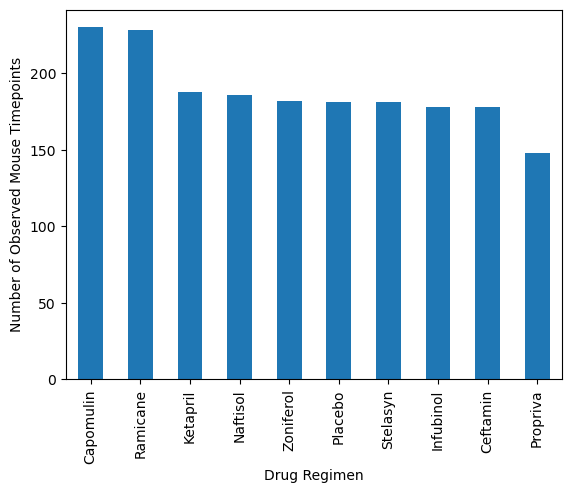

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

observed_mice = clean_mouse_df['Drug Regimen'].value_counts()
observed_mice.plot.bar(color='tab:blue')
plt.xlabel('Drug Regimen')
plt.ylabel("Number of Observed Mouse Timepoints")

# Show plot
plt.show()

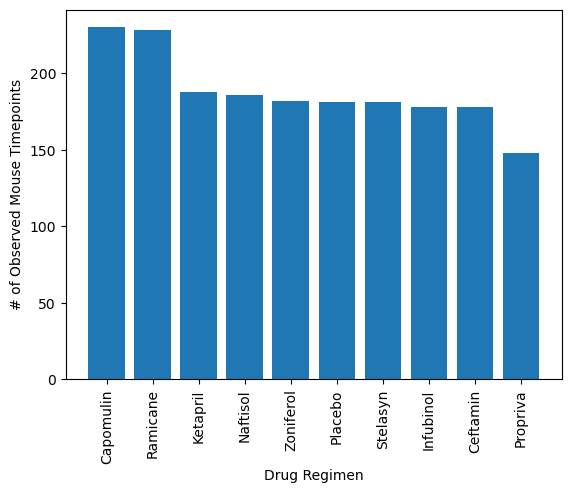

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(observed_mice))
plt.bar(x_axis, observed_mice, color='tab:blue', align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, observed_mice.index.values)
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

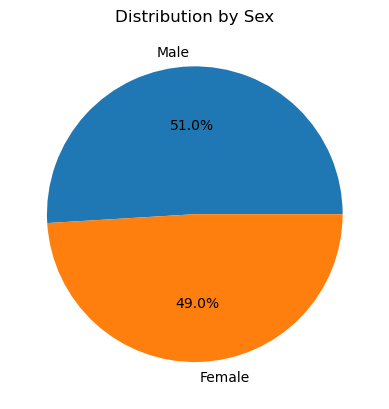

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = clean_mouse_df['Sex'].value_counts()

size = mice_gender
labels = ['Male','Female']
plt.title('Distribution by Sex')

plt.pie(mice_gender, labels=labels, autopct="%1.1f%%")
plt.show()

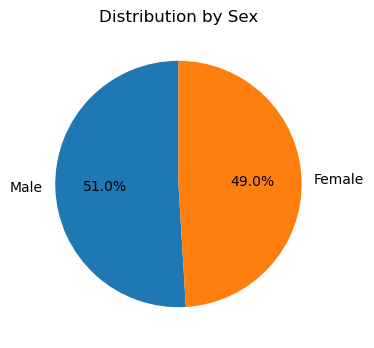

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig = plt.figure(figsize=(10,4))
plt.pie(mice_gender, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution by Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_time_df = clean_mouse_df.groupby(['Mouse ID'])['Timepoint'].max()
greatest_time_df = greatest_time_df.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_df = greatest_time_df.merge(clean_mouse_df, on=['Mouse ID','Timepoint'], how='left')
merge_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
#Used ChatGPT to debug and help me correct my code for this part. Also worked on this with study group. 
sorted_vol_data = merge_df.sort_values('Tumor Volume (mm3)')

#create an empty list to capture each drug
#Study group pointed out I had this bit wrong: at first I thought we needed to capture each drug but the instructions clarify that we only need 4 specific drugs
# old code: treatments = sorted_vol_data['Drug Regimen'].unique()
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#variable for outliers
potential_outliers = {}

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data = sorted_vol_data.loc[sorted_vol_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    # Calculate the quartiles
    q1 = drug_data.quantile(0.25)
    q3 = drug_data.quantile(0.75)
    
    # Calculate the IQR
    iqr = q3 - q1
    
    # Calculate the lower and upper bounds for potential outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Determine outliers using upper and lower bounds
    potential_outliers[drug] = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]
    
    # Append the tumor volume data for plotting
    tumor_vol_data.append(drug_data)
    
for drug in treatments:
    print(f"{drug}'s potential outliers: {potential_outliers[drug]}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


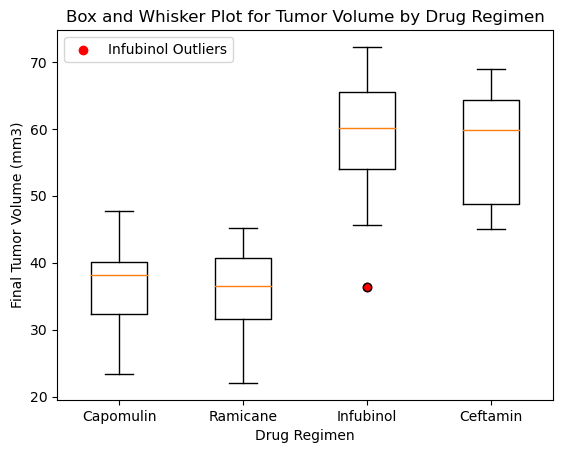

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments, showfliers=True)

plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Box and Whisker Plot for Tumor Volume by Drug Regimen")

# Potential outliers
for drug, outliers in potential_outliers.items():
    if not outliers.empty:
        plt.scatter([treatments.index(drug) + 1] * len(outliers), outliers, color='red', label=f'{drug} Outliers')

plt.legend()
plt.show()

## Line and Scatter Plots

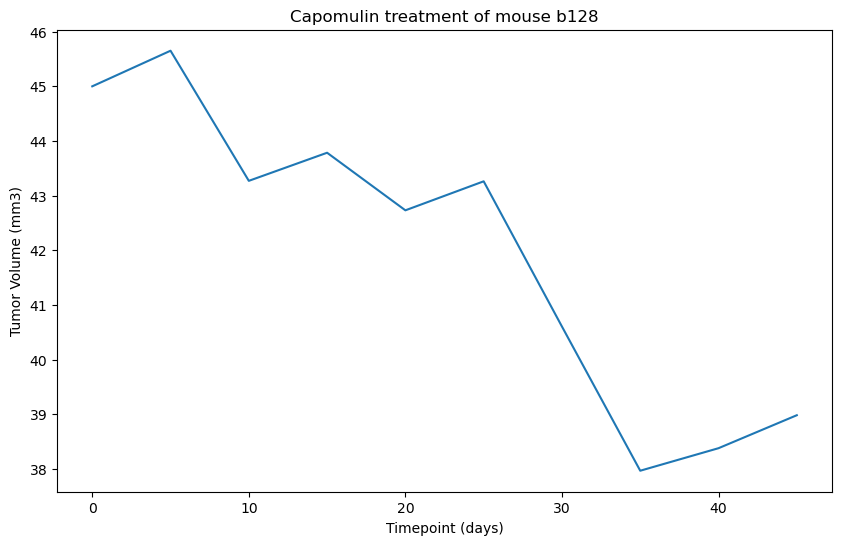

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'b128'
capomulin_data = clean_mouse_df[clean_mouse_df["Mouse ID"] == mouse_id]
plt.figure(figsize=(10, 6))
plt.plot(capomulin_data["Timepoint"], capomulin_data["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse b128")
plt.show()

In [29]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = clean_mouse_df[clean_mouse_df["Drug Regimen"] == 'Capomulin']
# capomulin.head()

# Group the data by mouse ID and calculate the average tumor volume for each mouse
average_tumor_volume = capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# average_tumor_volume.head()

# Merge the average tumor volume data back with the original DataFrame to include the weight
capomulin_avg_tumor_volume = pd.merge(average_tumor_volume, capomulin[['Mouse ID', 'Weight (g)']], on='Mouse ID')




capomulin_avg_tumor_volume.head()

,Mouse ID,Tumor Volume (mm3),Weight (g)
0,b128,41.963636,22
1,b128,41.963636,22
2,b128,41.963636,22
3,b128,41.963636,22
4,b128,41.963636,22


## Correlation and Regression

In [36]:
# print(capomulin.columns)
capomulin['Weight (g)'].dtype



dtype('int64')

The correlation between mouse weight and the average tumor volume is 0.83


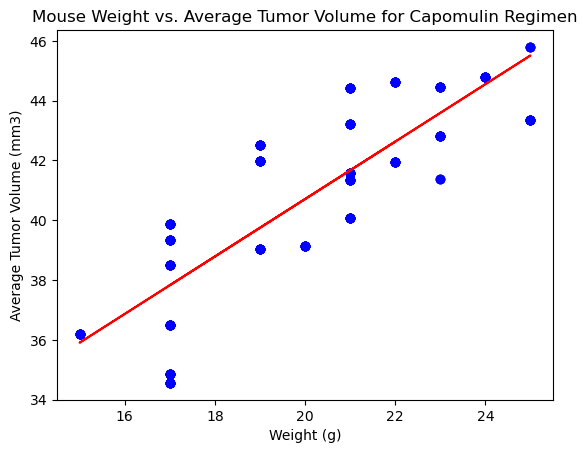

In [30]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(capomulin_avg_tumor_volume['Weight (g)'], capomulin_avg_tumor_volume['Tumor Volume (mm3)'])

# Display the correlation
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}")

x_axis = capomulin_avg_tumor_volume['Weight (g)']
y_axis = capomulin_avg_tumor_volume['Tumor Volume (mm3)']
plt.scatter(x_axis, y_axis, marker='o', facecolors='blue')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, "r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.show()

